# TheShortcut, Project: STUDYING CYCLIST VOLUMES IN HELSINKI

team: GeoNobles, Group 1, Seppo Kotiniemi, 2020-04-05

In this sub- project cyclists volume data generated in the project is combined with weater data on hourly level for analysis purposes.

The hourly level Weather Data data e.g. Temperature is downloaded from Finnish Meterological Institue open data website. The hour and measurement station level Helsinki Cylclist Data is created in the project.

Three full years (2016 - 2018) is analysed. The measurement stations that have a lot of NaN data are dropped. Missing Snow depth information is updated manually by interpolarisation.

Content: 

A. Creating the Data Frame

1. Import Libaries 
2. Read 2 datasets and first view on raw data
2. Data set cleanings, 1st phase: Select years, drop NaN:s, combine stations
4. Combining 2 data sets to one Data Frame: date and time handling for the merge operation and renaming and rearranging the columns
5. Filling in missing information, SnowDepth

B. ANALYSING CLEAN DATASET, CONTENT:

6. Final Data Frame - Exploratory analysis
7. Total cyclist volumes in 3 years per measurement station
8. Monthly cyclist volumes
9. Hourly distribution, STD deviation. Shape / Boxplot
10. Distribution per Daytime / Hour
11. Distribution per Weekday

C. IMPACT OF WEATHER TO CYCLIST FIGURES

12. Impact of Air Temperature: Temperatures,Total volumes, Value counts per Temperature, Averages, Impact on work traffic, Impact on weekend traffic
13. Impact of Relative Humidity
14. Pairplots
-------

17. Extra

# 1. Import Libraries 


In [35]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read 2 Datasets and create first view on raw data
Temperatures from Finnish Meteorological Institute website (selected hourly data, year 2014 - 2018). Cyclists = Helsinki cyclists information: cleaned data from Projects own GitHub. Take only years 2016-2018 from cyclists.

In [36]:
# Read years 2014 - 2018
temperatures = pd.read_csv('csv-9d722885-da5f-4385-aaa5-f4983b8f75d7.csv')
# HelsinkiBikers_cleanDataset from GitHub') / preprosessed by the project (Katariina)
cyclists = pd.read_csv('https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Katariina/HelsinkiBikers_cleanDataset.csv')

In [37]:
temperatures.head(2)

Year  m  d   Time Time zone  Relative humidity (%)  Snow depth (cm)  \
0  2016  1  1  00:00       UTC                   81.0              0.0   
1  2016  1  1  01:00       UTC                   78.0              0.0   

   Air temperature (degC)  Wind direction (deg)  Wind speed (m/s)  
0                    -3.5                 164.0               4.3  
1                    -3.5                 144.0               4.1

In [38]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 10 columns):
Year                      26305 non-null int64
m                         26305 non-null int64
d                         26305 non-null int64
Time                      26305 non-null object
Time zone                 26305 non-null object
Relative humidity (%)     26274 non-null float64
Snow depth (cm)           26221 non-null float64
Air temperature (degC)    26303 non-null float64
Wind direction (deg)      26070 non-null float64
Wind speed (m/s)          26069 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.0+ MB


In [39]:
cyclists.head(2)

Weekday        Date      Time  Auroransilta  Etelaesplanadi  \
0     Wed  2014-01-01  00:00:00           NaN             7.0   
1     Wed  2014-01-01  01:00:00           NaN             5.0   

   Huopalahti (station)  Kaisaniemi/ Elaintarhanlahti  Kaivokatu  \
0                   NaN                           1.0        NaN   
1                   NaN                           3.0        NaN   

   Kulosaari bridge south  Kulosaari bridge north  ...  Merikannontie  \
0                     NaN                     NaN  ...            NaN   
1                     NaN                     NaN  ...            NaN   

   Munkkiniemi bridge south side  Munkkiniemi bridge north side  \
0                            2.0                            5.0   
1                            6.0                            5.0   

   Heperia park/Ooppera  Pitkasilta east side  Pitkasilta west side  \
0                   3.0                   NaN                  11.0   
1                   1.0                   NaN                   8.0   

   Lauttasaari bridge north side  Ratapihantie  Viikintie  Baana  
0                            NaN           NaN        NaN      8  
1                            NaN           NaN        NaN      4  

[2 rows x 23 columns]

In [40]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 23 columns):
Weekday                          51120 non-null object
Date                             51120 non-null object
Time                             51120 non-null object
Auroransilta                     17306 non-null float64
Etelaesplanadi                   50450 non-null float64
Huopalahti (station)             39335 non-null float64
Kaisaniemi/ Elaintarhanlahti     51118 non-null float64
Kaivokatu                        17304 non-null float64
Kulosaari bridge south           39335 non-null float64
Kulosaari bridge north           39335 non-null float64
Kuusisaarentie                   39335 non-null float64
Kapyla, Pohjoisbaana             18462 non-null float64
Lauttasaari bridge south side    44230 non-null float64
Merikannontie                    44230 non-null float64
Munkkiniemi bridge south side    50815 non-null float64
Munkkiniemi bridge north side    51118 non-null float6

# 3 Data set cleaning, 1st phase
- Select years 2016 -2018
- How many NaN -rows?
- combine columns (bridges - two diretions)
- Drop columns, i.e. measurement stations with lot of NaN:s

In [41]:
# only years 2016-2018
cyclists = cyclists[cyclists.Date.str[0:4].isin(['2016','2017','2018'])]
cyclists.head(2)

Weekday        Date      Time  Auroransilta  Etelaesplanadi  \
17520     Fri  2016-01-01  00:00:00           NaN            12.0   
17521     Fri  2016-01-01  01:00:00           NaN             3.0   

       Huopalahti (station)  Kaisaniemi/ Elaintarhanlahti  Kaivokatu  \
17520                   0.0                           5.0        NaN   
17521                   2.0                           4.0        NaN   

       Kulosaari bridge south  Kulosaari bridge north  ...  Merikannontie  \
17520                     0.0                     4.0  ...            2.0   
17521                     0.0                    10.0  ...            1.0   

       Munkkiniemi bridge south side  Munkkiniemi bridge north side  \
17520                            3.0                            2.0   
17521                            0.0                            1.0   

       Heperia park/Ooppera  Pitkasilta east side  Pitkasilta west side  \
17520                  11.0                   7.0                  11.0   
17521                   1.0                   4.0                   6.0   

       Lauttasaari bridge north side  Ratapihantie  Viikintie  Baana  
17520                            3.0           2.0        NaN      6  
17521                            4.0          10.0        NaN      5  

[2 rows x 23 columns]

In [42]:
# How many rows with NaN information?
sum([True for idx,row in cyclists.iterrows() if any(row.isnull())])
# so 17656 rows containing NaN somewhere


17656

In [43]:
# Add bridges south and north and east and west
cyclists['Kulosaari bridge north'] = cyclists['Kulosaari bridge south'] + cyclists['Kulosaari bridge north']
cyclists['Munkkiniemi bridge south side'] = cyclists['Munkkiniemi bridge north side'] + cyclists['Munkkiniemi bridge south side']
cyclists['Pitkasilta east side'] = cyclists['Pitkasilta west side'] + cyclists['Pitkasilta east side']
cyclists['Lauttasaari bridge south side'] = cyclists['Lauttasaari bridge north side'] + cyclists['Lauttasaari bridge south side']


In [44]:
# Remove columns = sations with a lot of NaN:s and geographically redundant stations (bridges)
cyclists = cyclists.drop(["Auroransilta","Etelaesplanadi", "Kaivokatu","Kulosaari bridge south","Kapyla, Pohjoisbaana","Munkkiniemi bridge north side", "Pitkasilta west side","Lauttasaari bridge north side","Viikintie"],axis=1)

In [45]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 17520 to 43823
Data columns (total 14 columns):
Weekday                          26304 non-null object
Date                             26304 non-null object
Time                             26304 non-null object
Huopalahti (station)             26304 non-null float64
Kaisaniemi/ Elaintarhanlahti     26304 non-null float64
Kulosaari bridge north           26304 non-null float64
Kuusisaarentie                   26304 non-null float64
Lauttasaari bridge south side    24944 non-null float64
Merikannontie                    26304 non-null float64
Munkkiniemi bridge south side    26304 non-null float64
Heperia park/Ooppera             26304 non-null float64
Pitkasilta east side             26304 non-null float64
Ratapihantie                     26304 non-null float64
Baana                            26304 non-null int64
dtypes: float64(10), int64(1), object(3)
memory usage: 3.0+ MB


# 4. Combining two datasets (df) to one Data Frame
managing the date and time information

In [46]:
# !!!! THIS CAN BE RUN JUST ONCE !!!!
#In Weather data date from int to str
temperatures["Year"] = temperatures["Year"].apply(str)
temperatures["m"] = temperatures["m"].apply(str)
temperatures["d"] = temperatures["d"].apply(str)
# add 0:s in front - is teheer a better way?
temperatures['m'] = np.where(temperatures.m.apply(int) < 10, "0"+temperatures.m, temperatures.m)
temperatures['d'] = np.where(temperatures.d.apply(int) < 10, "0"+temperatures.d, temperatures.d)
# combine
temperatures["date"] = temperatures["Year"]+"-"+temperatures["m"]+"-"+temperatures["d"]
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 11 columns):
Year                      26305 non-null object
m                         26305 non-null object
d                         26305 non-null object
Time                      26305 non-null object
Time zone                 26305 non-null object
Relative humidity (%)     26274 non-null float64
Snow depth (cm)           26221 non-null float64
Air temperature (degC)    26303 non-null float64
Wind direction (deg)      26070 non-null float64
Wind speed (m/s)          26069 non-null float64
date                      26305 non-null object
dtypes: float64(5), object(6)
memory usage: 2.2+ MB


In [47]:
#rename columns - remove spaces
temperatures.columns=['Year','m','d','Time','TimeZone','RelativeHumidity(%)','SnowDepth(cm)','AirTemperature(degC)','WindDirection(deg)','WindSpeed(m/s)','Date']
# Rearrange columns
temperatures = temperatures[['Date','Time','RelativeHumidity(%)','AirTemperature(degC)', 'SnowDepth(cm)','WindSpeed(m/s)','WindDirection(deg)']]#
temperatures.head()

Date   Time  RelativeHumidity(%)  AirTemperature(degC)  \
0  2016-01-01  00:00                 81.0                  -3.5   
1  2016-01-01  01:00                 78.0                  -3.5   
2  2016-01-01  02:00                 78.0                  -3.3   
3  2016-01-01  03:00                 78.0                  -3.0   
4  2016-01-01  04:00                 76.0                  -3.5   

   SnowDepth(cm)  WindSpeed(m/s)  WindDirection(deg)  
0            0.0             4.3               164.0  
1            0.0             4.1               144.0  
2            0.0             5.0               173.0  
3            0.0             3.9               147.0  
4            0.0             3.4               144.0

In [48]:
# Cycists time to same format than in weather data
cyclists['Time'] = cyclists.Time.str[0:5]
cyclists.head()
# rename columns

Weekday        Date   Time  Huopalahti (station)  \
17520     Fri  2016-01-01  00:00                   0.0   
17521     Fri  2016-01-01  01:00                   2.0   
17522     Fri  2016-01-01  02:00                   1.0   
17523     Fri  2016-01-01  03:00                   1.0   
17524     Fri  2016-01-01  04:00                   0.0   

       Kaisaniemi/ Elaintarhanlahti  Kulosaari bridge north  Kuusisaarentie  \
17520                           5.0                     4.0             1.0   
17521                           4.0                    10.0             0.0   
17522                           2.0                     8.0             0.0   
17523                           3.0                     4.0             1.0   
17524                           0.0                     2.0             1.0   

       Lauttasaari bridge south side  Merikannontie  \
17520                            7.0            2.0   
17521                            4.0            1.0   
17522                           10.0            2.0   
17523                            2.0            1.0   
17524                            3.0            3.0   

       Munkkiniemi bridge south side  Heperia park/Ooppera  \
17520                            5.0                  11.0   
17521                            1.0                   1.0   
17522                            4.0                   6.0   
17523                            1.0                   4.0   
17524                            4.0                   6.0   

       Pitkasilta east side  Ratapihantie  Baana  
17520                  18.0           2.0      6  
17521                  10.0          10.0      5  
17522                  18.0           2.0      5  
17523                   7.0           7.0      3  
17524                  13.0           1.0      3

In [49]:
# Merge
df = pd.merge(temperatures, cyclists, how='left', on=['Date','Time'])
df.head()

Date   Time  RelativeHumidity(%)  AirTemperature(degC)  \
0  2016-01-01  00:00                 81.0                  -3.5   
1  2016-01-01  01:00                 78.0                  -3.5   
2  2016-01-01  02:00                 78.0                  -3.3   
3  2016-01-01  03:00                 78.0                  -3.0   
4  2016-01-01  04:00                 76.0                  -3.5   

   SnowDepth(cm)  WindSpeed(m/s)  WindDirection(deg) Weekday  \
0            0.0             4.3               164.0     Fri   
1            0.0             4.1               144.0     Fri   
2            0.0             5.0               173.0     Fri   
3            0.0             3.9               147.0     Fri   
4            0.0             3.4               144.0     Fri   

   Huopalahti (station)  Kaisaniemi/ Elaintarhanlahti  Kulosaari bridge north  \
0                   0.0                           5.0                     4.0   
1                   2.0                           4.0                    10.0   
2                   1.0                           2.0                     8.0   
3                   1.0                           3.0                     4.0   
4                   0.0                           0.0                     2.0   

   Kuusisaarentie  Lauttasaari bridge south side  Merikannontie  \
0             1.0                            7.0            2.0   
1             0.0                            4.0            1.0   
2             0.0                           10.0            2.0   
3             1.0                            2.0            1.0   
4             1.0                            3.0            3.0   

   Munkkiniemi bridge south side  Heperia park/Ooppera  Pitkasilta east side  \
0                            5.0                  11.0                  18.0   
1                            1.0                   1.0                  10.0   
2                            4.0                   6.0                  18.0   
3                            1.0                   4.0                   7.0   
4                            4.0                   6.0                  13.0   

   Ratapihantie  Baana  
0           2.0    6.0  
1          10.0    5.0  
2           2.0    5.0  
3           7.0    3.0  
4           1.0    3.0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26305 entries, 0 to 26304
Data columns (total 19 columns):
Date                             26305 non-null object
Time                             26305 non-null object
RelativeHumidity(%)              26274 non-null float64
AirTemperature(degC)             26303 non-null float64
SnowDepth(cm)                    26221 non-null float64
WindSpeed(m/s)                   26069 non-null float64
WindDirection(deg)               26070 non-null float64
Weekday                          26304 non-null object
Huopalahti (station)             26304 non-null float64
Kaisaniemi/ Elaintarhanlahti     26304 non-null float64
Kulosaari bridge north           26304 non-null float64
Kuusisaarentie                   26304 non-null float64
Lauttasaari bridge south side    24944 non-null float64
Merikannontie                    26304 non-null float64
Munkkiniemi bridge south side    26304 non-null float64
Heperia park/Ooppera             26304 non-null float6

In [51]:
#rename columns
df.columns = ['Date', 'Time',
       'RelativeHumidity(%)', 'AirTemperature(degC)', 'SnowDepth(cm)',
       'WindSpeed(m/s)', 'WindDirection(deg)', 'Weekday',
       'Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']
#arrange 
df = df[['Date', 'Time', 'Weekday',
       'RelativeHumidity(%)', 'AirTemperature(degC)', 'SnowDepth(cm)',
       'WindSpeed(m/s)', 'WindDirection(deg)',
       'Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']]
#remove last row (1 hour in year 2019)
df.head()
df.tail()

Date   Time Weekday  RelativeHumidity(%)  AirTemperature(degC)  \
26300  2018-12-31  20:00     Mon                 91.0                   1.0   
26301  2018-12-31  21:00     Mon                 88.0                   1.3   
26302  2018-12-31  22:00     Mon                 95.0                   0.8   
26303  2018-12-31  23:00     Mon                 95.0                   1.1   
26304  2019-01-01  00:00     NaN                 94.0                   1.4   

       SnowDepth(cm)  WindSpeed(m/s)  WindDirection(deg)  Huopalahti  \
26300            0.0             8.8               207.0         4.0   
26301            0.0             9.5               207.0         1.0   
26302            0.0             7.6               200.0         3.0   
26303            2.0             8.6               204.0         1.0   
26304            2.0             8.4               207.0         NaN   

       Kaisaniemi/Elaintarha  Kulosaari_bridge  Kuusisaarentie  \
26300                    1.0               4.0             6.0   
26301                    2.0               5.0             1.0   
26302                    2.0               4.0             0.0   
26303                    3.0               2.0             3.0   
26304                    NaN               NaN             NaN   

       Lauttasaari_bridge  Merikannontie  Munkkiniemi_bridge  \
26300                 NaN            2.0                 3.0   
26301                 NaN            7.0                 5.0   
26302                 NaN            0.0                 0.0   
26303                 NaN            0.0                 2.0   
26304                 NaN            NaN                 NaN   

       Heperia_park/Opera  Pitkasilta_bridge  Ratapihantie  Baana  
26300                11.0               14.0           7.0    9.0  
26301                 5.0                3.0          10.0    5.0  
26302                 7.0               10.0           8.0    7.0  
26303                 7.0               13.0           1.0    2.0  
26304                 NaN                NaN           NaN    NaN

# 5. Fill in missing information, Snow depth, Drop the last row (next year)

In [52]:
# fill in missing Snow depth info
# Snow depth corrections SOLUTION LOOKED FROM EXCEL SHEET. Missing mostly summer time data
# case['location'] = np.where(case.prov_state.isnull(), case.country, case.prov_state)
df['SnowDepth(cm)'] = np.where(df['SnowDepth(cm)'].isnull(), 0.0, df['SnowDepth(cm)'])
df.loc[273:325,'SnowDepth(cm)'] = 23.0
df.loc[425:427,'SnowDepth(cm)'] = 22.0
df.loc[560:622,'SnowDepth(cm)'] = 22.0
df.loc[19151:19211,'SnowDepth(cm)'] = 23.0
df.loc[19742:19761,'SnowDepth(cm)'] = 23.0

# drop the last row (1st hour of year 2019)
df = df.drop(df.index[26304])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 0 to 26303
Data columns (total 19 columns):
Date                     26304 non-null object
Time                     26304 non-null object
Weekday                  26304 non-null object
RelativeHumidity(%)      26273 non-null float64
AirTemperature(degC)     26302 non-null float64
SnowDepth(cm)            26304 non-null float64
WindSpeed(m/s)           26068 non-null float64
WindDirection(deg)       26069 non-null float64
Huopalahti               26304 non-null float64
Kaisaniemi/Elaintarha    26304 non-null float64
Kulosaari_bridge         26304 non-null float64
Kuusisaarentie           26304 non-null float64
Lauttasaari_bridge       24944 non-null float64
Merikannontie            26304 non-null float64
Munkkiniemi_bridge       26304 non-null float64
Heperia_park/Opera       26304 non-null float64
Pitkasilta_bridge        26304 non-null float64
Ratapihantie             26304 non-null float64
Baana                    26304

# 6. Ready Data Frame, Exploratory analysis

In [53]:
df.tail()

Date   Time Weekday  RelativeHumidity(%)  AirTemperature(degC)  \
26299  2018-12-31  19:00     Mon                 85.0                   0.9   
26300  2018-12-31  20:00     Mon                 91.0                   1.0   
26301  2018-12-31  21:00     Mon                 88.0                   1.3   
26302  2018-12-31  22:00     Mon                 95.0                   0.8   
26303  2018-12-31  23:00     Mon                 95.0                   1.1   

       SnowDepth(cm)  WindSpeed(m/s)  WindDirection(deg)  Huopalahti  \
26299            0.0             8.6               209.0         8.0   
26300            0.0             8.8               207.0         4.0   
26301            0.0             9.5               207.0         1.0   
26302            0.0             7.6               200.0         3.0   
26303            2.0             8.6               204.0         1.0   

       Kaisaniemi/Elaintarha  Kulosaari_bridge  Kuusisaarentie  \
26299                    3.0               5.0             8.0   
26300                    1.0               4.0             6.0   
26301                    2.0               5.0             1.0   
26302                    2.0               4.0             0.0   
26303                    3.0               2.0             3.0   

       Lauttasaari_bridge  Merikannontie  Munkkiniemi_bridge  \
26299                 NaN            6.0                12.0   
26300                 NaN            2.0                 3.0   
26301                 NaN            7.0                 5.0   
26302                 NaN            0.0                 0.0   
26303                 NaN            0.0                 2.0   

       Heperia_park/Opera  Pitkasilta_bridge  Ratapihantie  Baana  
26299                12.0               12.0           4.0    2.0  
26300                11.0               14.0           7.0    9.0  
26301                 5.0                3.0          10.0    5.0  
26302                 7.0               10.0           8.0    7.0  
26303                 7.0               13.0           1.0    2.0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 0 to 26303
Data columns (total 19 columns):
Date                     26304 non-null object
Time                     26304 non-null object
Weekday                  26304 non-null object
RelativeHumidity(%)      26273 non-null float64
AirTemperature(degC)     26302 non-null float64
SnowDepth(cm)            26304 non-null float64
WindSpeed(m/s)           26068 non-null float64
WindDirection(deg)       26069 non-null float64
Huopalahti               26304 non-null float64
Kaisaniemi/Elaintarha    26304 non-null float64
Kulosaari_bridge         26304 non-null float64
Kuusisaarentie           26304 non-null float64
Lauttasaari_bridge       24944 non-null float64
Merikannontie            26304 non-null float64
Munkkiniemi_bridge       26304 non-null float64
Heperia_park/Opera       26304 non-null float64
Pitkasilta_bridge        26304 non-null float64
Ratapihantie             26304 non-null float64
Baana                    26304

In [55]:
df.describe()

RelativeHumidity(%)  AirTemperature(degC)  SnowDepth(cm)  \
count         26273.000000          26302.000000   26304.000000   
mean             78.843528              6.890404       1.609565   
std              15.633433              8.726058       5.309979   
min              19.000000            -23.800000      -1.000000   
25%              70.000000              0.700000      -1.000000   
50%              83.000000              6.000000       0.000000   
75%              91.000000             14.300000       0.000000   
max             100.000000             30.200000      23.000000   

       WindSpeed(m/s)  WindDirection(deg)    Huopalahti  \
count    26068.000000        26069.000000  26304.000000   
mean         3.491511          201.140857     47.091735   
std          1.575584          100.702340     73.634712   
min          0.000000            0.000000      0.000000   
25%          2.400000          117.000000      4.000000   
50%          3.300000          222.000000     18.000000   
75%          4.400000          283.000000     57.000000   
max         12.400000          360.000000    688.000000   

       Kaisaniemi/Elaintarha  Kulosaari_bridge  Kuusisaarentie  \
count           26304.000000      26304.000000    26304.000000   
mean               47.609907         65.209094       44.514713   
std                65.554367         91.329768       68.011190   
min                 0.000000          0.000000        0.000000   
25%                 4.000000          7.000000        3.000000   
50%                20.000000         27.000000       15.000000   
75%                67.000000         88.000000       58.250000   
max               504.000000        780.000000      546.000000   

       Lauttasaari_bridge  Merikannontie  Munkkiniemi_bridge  \
count        24944.000000   26304.000000        26304.000000   
mean           130.940266      76.669632           75.334930   
std            169.369571     106.428303          102.685874   
min              0.000000       0.000000            0.000000   
25%             14.000000       5.000000            7.000000   
50%             59.000000      28.000000           32.000000   
75%            190.000000     107.000000          106.000000   
max           1254.000000     731.000000          693.000000   

       Heperia_park/Opera  Pitkasilta_bridge  Ratapihantie         Baana  
count        26304.000000       26304.000000  26304.000000  26304.000000  
mean           103.557330         110.973920     49.951262    101.274293  
std            144.560935         133.610239     73.500443    136.121898  
min              0.000000           0.000000      0.000000      0.000000  
25%             10.000000          16.000000      6.000000     10.000000  
50%             41.000000          55.000000     22.000000     41.000000  
75%            143.000000         164.000000     61.000000    146.000000  
max           1153.000000         854.000000    655.000000    863.000000

# 7. Total cyclist volumes in 3 years per measurement station

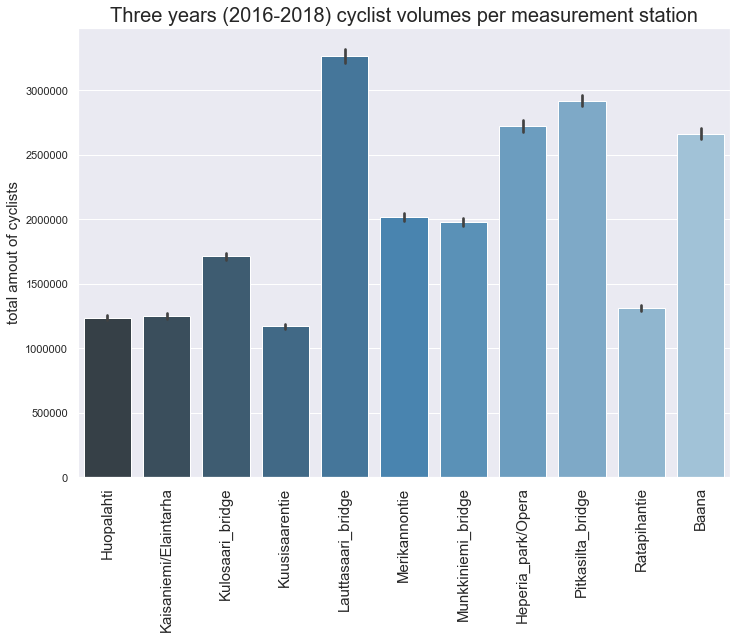

In [56]:
# barplots on total sum and mean prer hour
dfc = df[['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set_palette("Blues_d")
#sns.palplot(sns.color_palette("Blues_d"))
#"RdBu", n_colors=7
plt.xticks(rotation=90, fontsize=15)
plt.ylabel("total amout of cyclists", fontsize=15)
plt.title("Three years (2016-2018) cyclist volumes per measurement station", fontsize=20)
with sns.color_palette("Blues_d", n_colors=11):
    sns.barplot(estimator=sum,data=dfc)

# 8. Monthly cyclist volumes

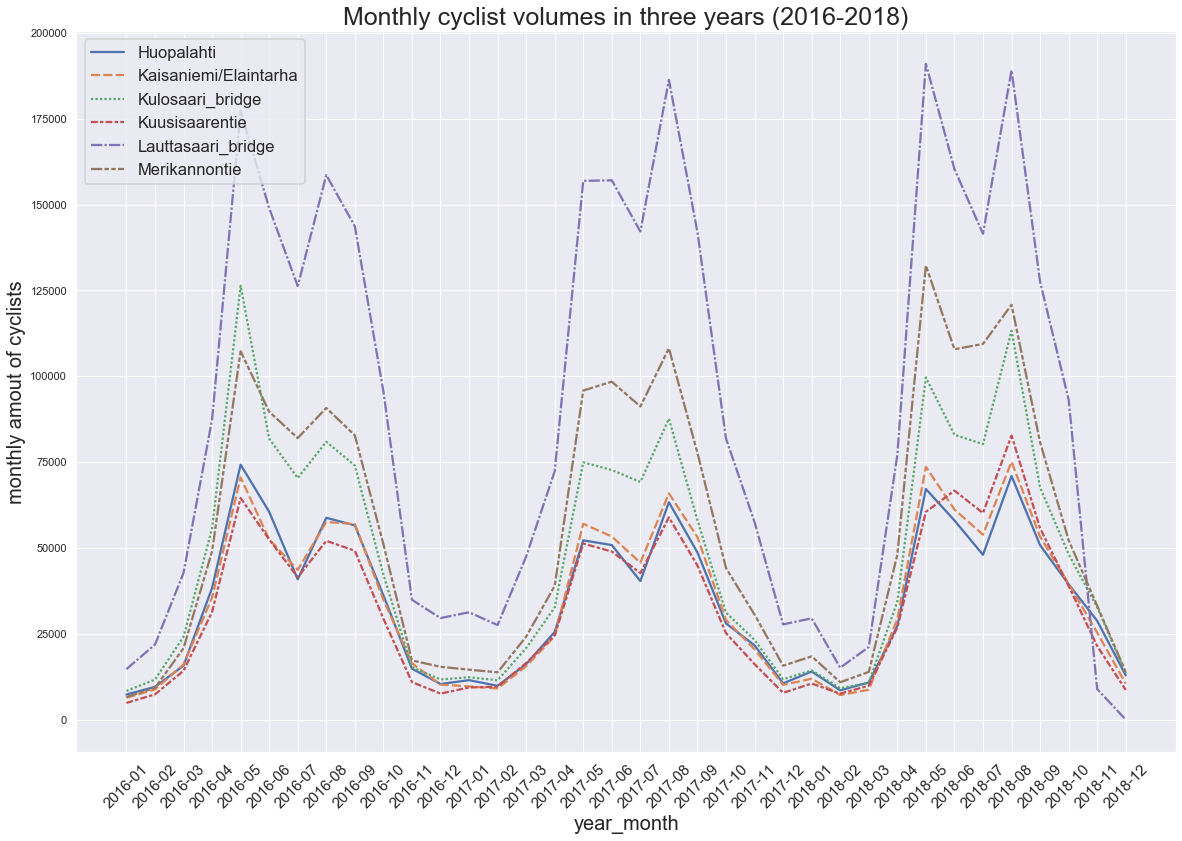

In [57]:
df.Date=pd.to_datetime(df.Date,format='%Y-%m-%d')
df['year_month'] = pd.to_datetime(df['Date']).dt.to_period('M')
toplot = df[['year_month','Huopalahti', 'Kaisaniemi/Elaintarha','Kulosaari_bridge', 'Kuusisaarentie','Lauttasaari_bridge', 'Merikannontie',]]
toplot = toplot.groupby(['year_month']).sum()
toplot.index=toplot.index.to_series().astype(str)
#toplot.info()
#toplot.head()
sns.set(rc={'figure.figsize':(19.7,13.27)})
plt.ylabel("monthly amout of cyclists", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.xlabel("Year_Month", fontsize=20)
plt.title("Monthly cyclist volumes in three years (2016-2018)", fontsize=25)
sns.set_context("talk")
sns.lineplot(data=toplot)

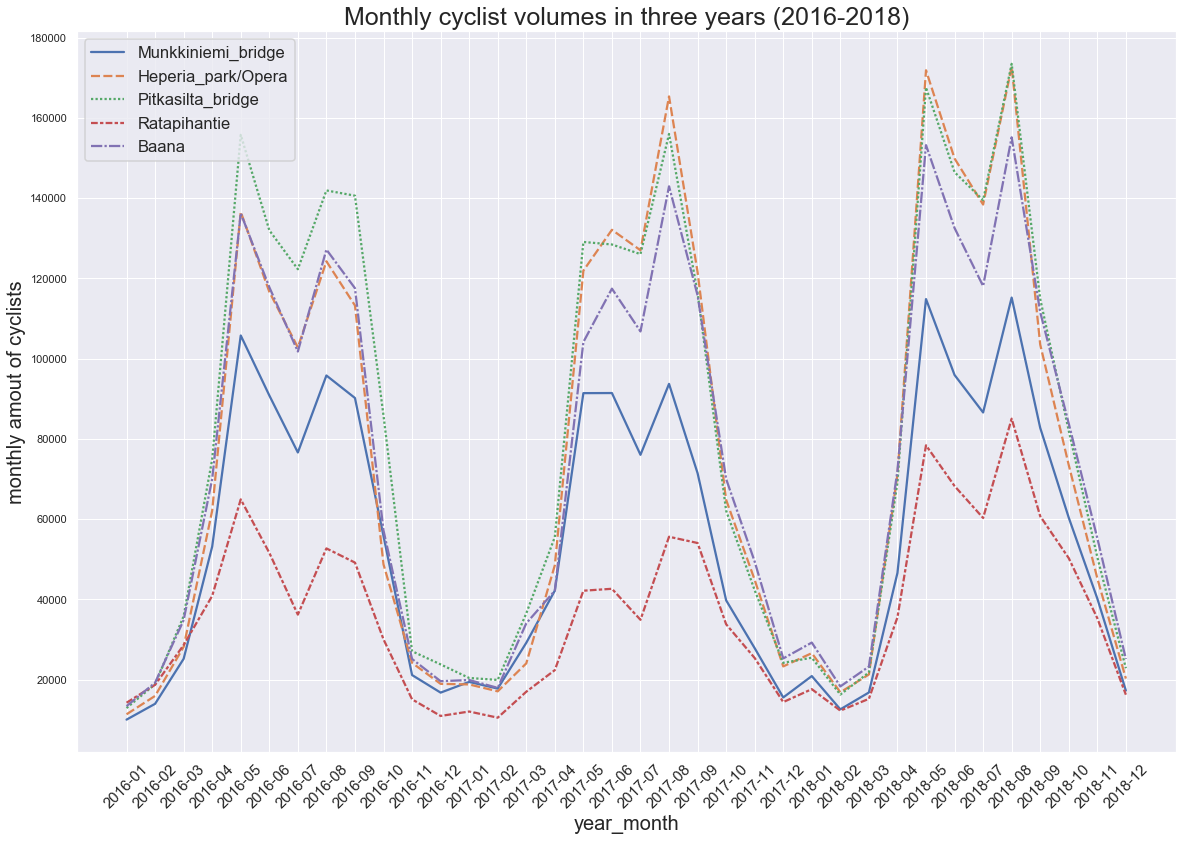

In [58]:
df['year_month'] = pd.to_datetime(df['Date']).dt.to_period('M')
toplot = df[['year_month','Munkkiniemi_bridge','Heperia_park/Opera', 'Pitkasilta_bridge','Ratapihantie', 'Baana']]
toplot = toplot.groupby(['year_month']).sum()
toplot.index=toplot.index.to_series().astype(str)
#toplot.info()
#toplot.head()
sns.set(rc={'figure.figsize':(19.7,13.27)})
plt.ylabel("monthly amout of cyclists", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.xlabel("Year_Month", fontsize=20)
plt.title("Monthly cyclist volumes in three years (2016-2018)", fontsize=25)
sns.set_context("talk")
sns.lineplot(data=toplot)

# 9. Hourly distribution, Std deviation, Shape / Boxplot

In [59]:
df.describe()

RelativeHumidity(%)  AirTemperature(degC)  SnowDepth(cm)  \
count         26273.000000          26302.000000   26304.000000   
mean             78.843528              6.890404       1.609565   
std              15.633433              8.726058       5.309979   
min              19.000000            -23.800000      -1.000000   
25%              70.000000              0.700000      -1.000000   
50%              83.000000              6.000000       0.000000   
75%              91.000000             14.300000       0.000000   
max             100.000000             30.200000      23.000000   

       WindSpeed(m/s)  WindDirection(deg)    Huopalahti  \
count    26068.000000        26069.000000  26304.000000   
mean         3.491511          201.140857     47.091735   
std          1.575584          100.702340     73.634712   
min          0.000000            0.000000      0.000000   
25%          2.400000          117.000000      4.000000   
50%          3.300000          222.000000     18.000000   
75%          4.400000          283.000000     57.000000   
max         12.400000          360.000000    688.000000   

       Kaisaniemi/Elaintarha  Kulosaari_bridge  Kuusisaarentie  \
count           26304.000000      26304.000000    26304.000000   
mean               47.609907         65.209094       44.514713   
std                65.554367         91.329768       68.011190   
min                 0.000000          0.000000        0.000000   
25%                 4.000000          7.000000        3.000000   
50%                20.000000         27.000000       15.000000   
75%                67.000000         88.000000       58.250000   
max               504.000000        780.000000      546.000000   

       Lauttasaari_bridge  Merikannontie  Munkkiniemi_bridge  \
count        24944.000000   26304.000000        26304.000000   
mean           130.940266      76.669632           75.334930   
std            169.369571     106.428303          102.685874   
min              0.000000       0.000000            0.000000   
25%             14.000000       5.000000            7.000000   
50%             59.000000      28.000000           32.000000   
75%            190.000000     107.000000          106.000000   
max           1254.000000     731.000000          693.000000   

       Heperia_park/Opera  Pitkasilta_bridge  Ratapihantie         Baana  
count        26304.000000       26304.000000  26304.000000  26304.000000  
mean           103.557330         110.973920     49.951262    101.274293  
std            144.560935         133.610239     73.500443    136.121898  
min              0.000000           0.000000      0.000000      0.000000  
25%             10.000000          16.000000      6.000000     10.000000  
50%             41.000000          55.000000     22.000000     41.000000  
75%            143.000000         164.000000     61.000000    146.000000  
max           1153.000000         854.000000    655.000000    863.000000

In [60]:
# compare stddeviations, it seems to be normalized
df.std()
# biggest differences: Hesperia, Baana and Kaisaniemi, Kuusisaarentie

RelativeHumidity(%)       15.633433
AirTemperature(degC)       8.726058
SnowDepth(cm)              5.309979
WindSpeed(m/s)             1.575584
WindDirection(deg)       100.702340
Huopalahti                73.634712
Kaisaniemi/Elaintarha     65.554367
Kulosaari_bridge          91.329768
Kuusisaarentie            68.011190
Lauttasaari_bridge       169.369571
Merikannontie            106.428303
Munkkiniemi_bridge       102.685874
Heperia_park/Opera       144.560935
Pitkasilta_bridge        133.610239
Ratapihantie              73.500443
Baana                    136.121898
dtype: float64

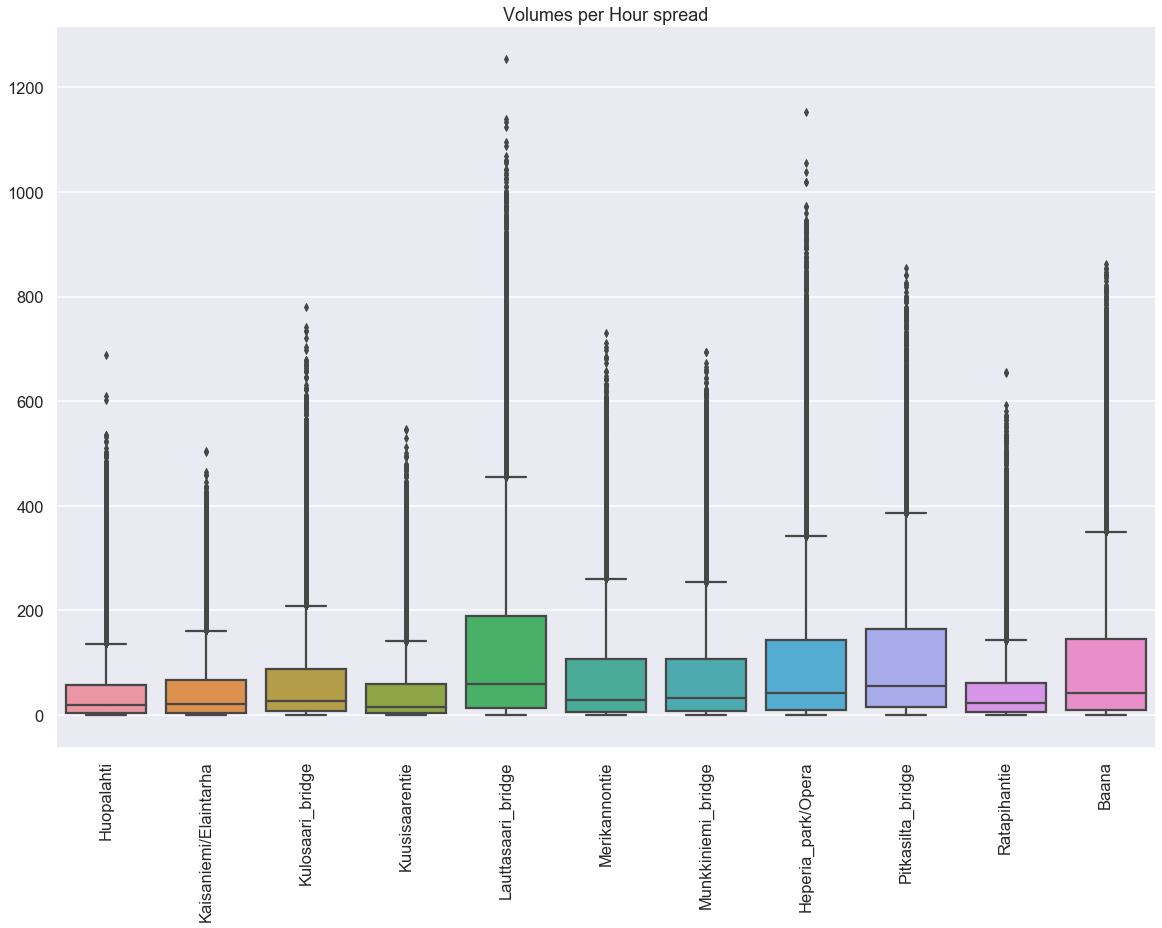

In [61]:
plt.title("Volumes per Hour spread")
plt.xticks(rotation=90)
sns.boxplot(data = dfc)

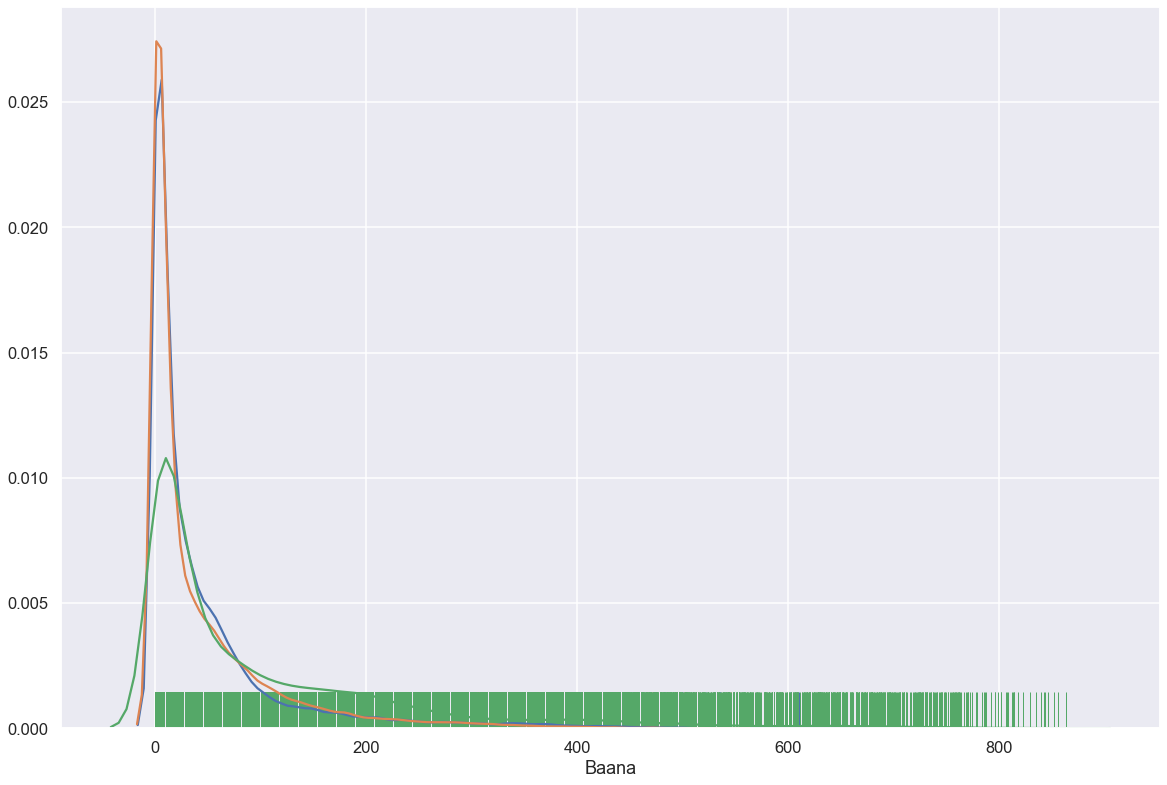

In [62]:
sns.distplot(df["Huopalahti"], hist=False, rug=True)
sns.distplot(df["Kuusisaarentie"], hist=False, rug=True)
sns.distplot(df["Baana"], hist=False, rug=True)

# 10. Distribution per Daytime / Hour

In [33]:
# group by hour and analyse the differences in 4
timegroup = df.groupby('Time').mean()
timegroup = timegroup[['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']]
timegroup

Huopalahti  Kaisaniemi/Elaintarha  Kulosaari_bridge  Kuusisaarentie  \
Time                                                                         
00:00    3.733577               6.766423         10.962591        3.062956   
01:00    2.368613               3.801095          6.627737        1.721715   
02:00    1.798358               2.499088          4.341241        1.013686   
03:00    1.197080               1.978102          3.594891        0.770073   
04:00    4.538321               1.978102          5.827555        1.311131   
05:00   14.253650               4.396898         15.241788        5.161496   
06:00   60.177920              22.947993         69.521898       32.085766   
07:00  135.862226              69.481752        135.561131      101.344891   
08:00  133.018248             120.896898        156.909672      121.694343   
09:00   52.508212              78.152372         79.964416       62.863139   
10:00   27.778285              44.537409         50.162409       35.697080   
11:00   29.606752              44.315693         55.961679       36.752737   
12:00   32.091241              48.973540         60.020985       40.584854   
13:00   35.249088              52.258212         63.581204       45.517336   
14:00   51.041058              59.602190         76.622263       52.186131   
15:00   99.469891              93.934307        130.020073       89.387774   
16:00  145.027372             131.660584        171.460766      127.782847   
17:00  111.267336             113.667883        142.530109      109.642336   
18:00   68.678832              81.374088        104.578467       73.239051   
19:00   43.706204              57.675182         78.385949       50.237226   
20:00   33.927007              43.947080         61.425182       37.033759   
21:00   22.988139              29.853102         43.121350       22.999088   
22:00   13.506387              17.281022         23.792883       11.036496   
23:00    6.407847              10.658759         14.802007        5.227190   

       Lauttasaari_bridge  Merikannontie  Munkkiniemi_bridge  \
Time                                                           
00:00           20.832692       6.140511            8.562044   
01:00           12.140385       3.158759            5.040146   
02:00            9.112500       1.793796            3.838504   
03:00            5.567308       1.417883            2.415146   
04:00            5.735577       1.548358            3.021898   
05:00           18.131731       7.286496            9.692518   
06:00           78.528846      47.856752           67.446168   
07:00          212.362500     140.795620          171.926095   
08:00          320.492782     158.962591          177.888686   
09:00          186.641963      93.974453           90.298358   
10:00          113.113571      61.602190           56.062044   
11:00          123.123195      69.950730           60.209854   
12:00          134.316651      82.229015           68.767336   
13:00          140.688162      87.925182           73.088504   
14:00          159.448508     102.933394           88.312044   
15:00          229.820982     162.047445          154.274635   
16:00          331.281039     202.884124          204.068431   
17:00          310.141482     176.602190          171.184307   
18:00          232.362849     137.003650          123.950730   
19:00          177.161694     109.139599           93.556569   
20:00          140.557267      88.108577           76.779197   
21:00           96.725698      57.474453           55.080292   
22:00           53.403272      27.135036           27.763686   
23:00           31.535130      12.100365           14.811131   

       Heperia_park/Opera  Pitkasilta_bridge  Ratapihantie       Baana  
Time                                                                    
00:00           16.119526          33.181569      5.794708   13.107664  
01:00            9.312044          22.331204      3.311131    7.762774  
02:00            6.25

Text(0.5, 0, 'DayTime')

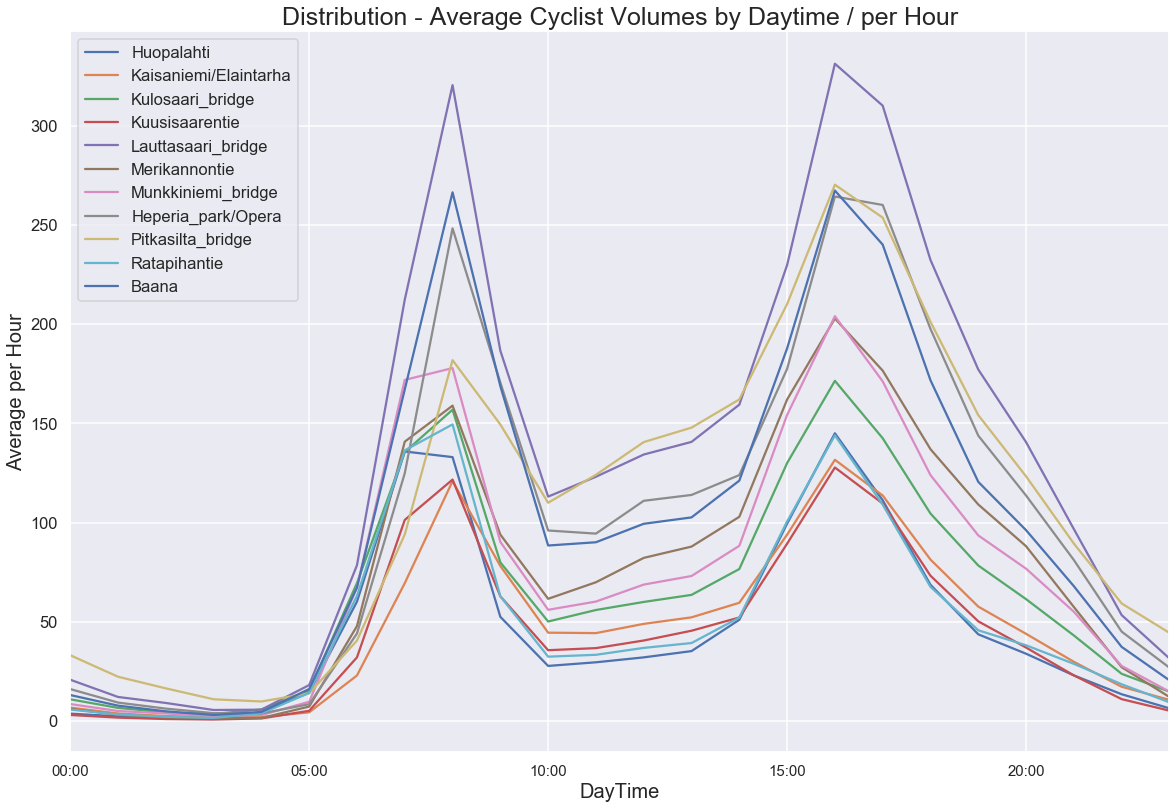

In [64]:
timegroup.reset_index().plot(x='Time', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']))
plt.title("Distribution - Average Cyclist Volumes by Daytime / per Hour", fontsize=25)
plt.ylabel("Average per Hour", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel("DayTime", fontsize=20)

# 11. Distribution per Weekday

In [65]:
weekdaygroup = df.groupby('Weekday').mean()
weekdaygroup

RelativeHumidity(%)  AirTemperature(degC)  SnowDepth(cm)  \
Weekday                                                             
Fri                79.298567              6.819639       1.645170   
Mon                78.925955              6.833891       1.529459   
Sat                78.521565              7.132696       1.510085   
Sun                79.409635              6.960801       1.454883   
Thu                79.715317              6.825788       1.671207   
Tue                78.441829              6.745459       1.708066   
Wed                77.587607              6.913328       1.750000   

         WindSpeed(m/s)  WindDirection(deg)  Huopalahti  \
Weekday                                                   
Fri            3.419877          207.327278   47.271231   
Mon            3.521964          194.375869   62.308917   
Sat            3.448103          208.007483   17.800159   
Sun            3.407045          201.441398   19.310510   
Thu            3.503868          199.950040   56.628205   
Tue            3.613853          193.880141   63.544872   
Wed            3.527300          202.917993   63.045406   

         Kaisaniemi/Elaintarha  Kulosaari_bridge  Kuusisaarentie  \
Weekday                                                            
Fri                  48.067675         62.905786       42.696391   
Mon                  58.136146         79.489119       56.171975   
Sat                  26.513270         37.307325       21.789013   
Sun                  25.462580         39.707803       26.537686   
Thu                  55.390491         73.451656       50.807692   
Tue                  59.702991         82.008280       56.739049   
Wed                  60.202991         81.859241       57.059028   

         Lauttasaari_bridge  Merikannontie  Munkkiniemi_bridge  \
Weekday                                                          
Fri              129.037752      72.612527           74.678609   
Mon              154.416573      90.493896           93.463376   
Sat               81.520134      47.309713           39.351115   
Sun               83.873881      54.339968           42.032378   
Thu              147.916104      85.231036           87.214209   
Tue              158.741836      92.918536           95.243056   
Wed              161.687500      94.050481           95.693910   

         Heperia_park/Opera  Pitkasilta_bridge  Ratapihantie       Baana  
Weekday                                                                   
Fri              101.813960         114.580679     50.890924  103.206476  
Mon              122.907113         123.380308     65.782113  124.023620  
Sat               60.301752          79.992304     20.523620   51.605096  
Sun               60.780255          69.772028     19.411359   52.951168  
Thu              119.693109         125.629006     60.623665  120.349359  
Tue              128.416132         129.884882     66.476229  127.868323  
Wed              131.427618         133.938301     66.227831  129.385951

Text(0.5, 1.0, 'Average Cyclist Volumes by Weekday')

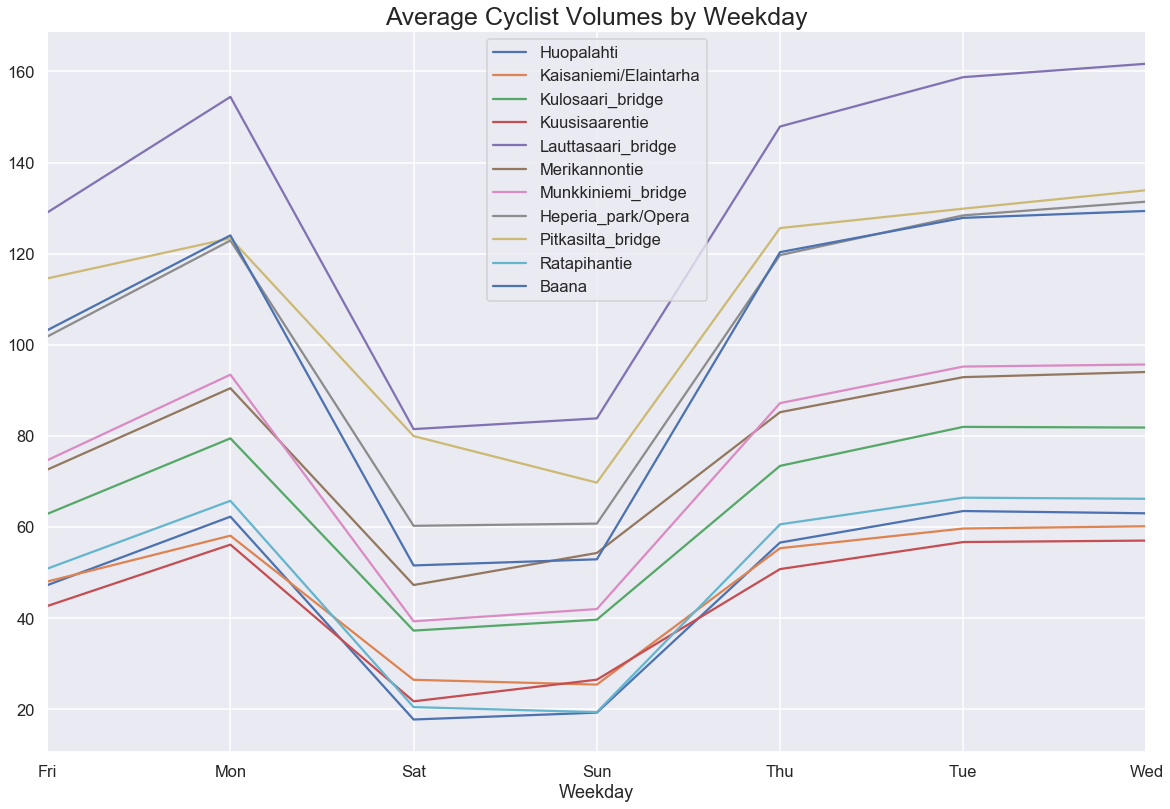

In [66]:
weekdaygroup.reset_index().plot(x='Weekday', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']))
plt.title("Average Cyclist Volumes by Weekday", fontsize=25)

In [67]:
# grouping to Moths and Weekdays
df['Month'] = pd.to_datetime(df['Date']).dt.month
kr = df.groupby(['Month','Weekday']).mean()
a = kr.reset_index()
a



Month Weekday  RelativeHumidity(%)  AirTemperature(degC)  SnowDepth(cm)  \
0       1     Fri            85.967949             -4.351923       5.788462   
1       1     Mon            87.657738             -3.464881       5.380952   
2       1     Sat            87.179739             -2.558654       5.230769   
3       1     Sun            86.800595             -2.953571       5.136905   
4       1     Thu            85.926829             -5.321875       6.725694   
..    ...     ...                  ...                   ...            ...   
79     12     Sat            86.347222              0.115000       0.650000   
80     12     Sun            85.449405             -0.495536       0.428571   
81     12     Thu            87.878205              0.909936       0.528846   
82     12     Tue            88.922807              0.585417       0.885417   
83     12     Wed            85.152778              1.189236       0.680556   

    WindSpeed(m/s)  WindDirection(deg)  Huopalahti  Kaisaniemi/Elaintarha  \
0         3.125321          193.900641   14.775641              13.003205   
1         3.622024          183.333333   21.595238              17.672619   
2         3.365595          223.749196    4.233974               5.701923   
3         3.543881          234.113433    4.363095               4.473214   
4         4.128125          191.045139   17.461806              14.600694   
..             ...                 ...         ...                    ...   
79        4.322222          224.750000    4.905556               6.483333   
80        4.402687          218.591045    5.214286               5.449405   
81        3.666667          212.400641   19.887821              17.689103   
82        3.811111          219.093750   19.847222              17.763889   
83        4.243403          240.461806   20.062500              17.423611   

    Kulosaari_bridge  Kuusisaarentie  Lauttasaari_bridge  Merikannontie  \
0          15.775641       11.253205           34.397436      18.266026   
1          22.083333       16.065476           45.604167      23.696429   
2           6.897436        3.897436           15.692308       8.012821   
3           7.002976        4.404762           16.002976       8.672619   
4          17.607639       12.579861           38.354167      20.034722   
..               ...             ...                 ...            ...   
79          7.305556        4.300000           21.187500       9.194444   
80          7.300595        4.699405           18.750000       9.750000   
81         21.137821       14.019231           51.870370      25.673077   
82         21.246528       13.753472           42.828125      24.711806   
83         21.496528       13.489583           46.250000      25.927083   

    Munkkiniemi_bridge  Heperia_park/Opera  Pitkasilta_bridge  Ratapihantie  \
0            23.721154           27.032051          27.964744     20.846154   
1            31.172619           33.711310          32.366071     27.845238   
2             9.256410           11.817308          18.532051      7.695513   
3             8.568452           10.404762          14.422619      6.470238   
4            26.569444           29.548611          28.381944     23.798611   
..                 ...                 ...                ...           ...   
79           10.147222           14.311111          21.286111      7.091667   
80            9.366071           12.791667          16.068452      6.702381   
81           28.294872           35.653846          40.157051     23.967949   
82           27.670139           35.142361          36.427083     24.579861   
83           29.138889           36.083333          38.343750     24.638889   

        Baana  
0   30.544872  
1   38.044643  
2   11.041667  
3    9.630952  
4   32.958333  
..        ...  
79  13.150000  
80  12.077381  
81  41.038462  
82  39.958333  
83  41.604167  

[84 rows x 18 columns]

# 12. Impact of Air Temperature 
- Temperatures
- Total volumes
- value counts per Temperature
- Averages
- impact on work traffic
- impact on weekend traffic

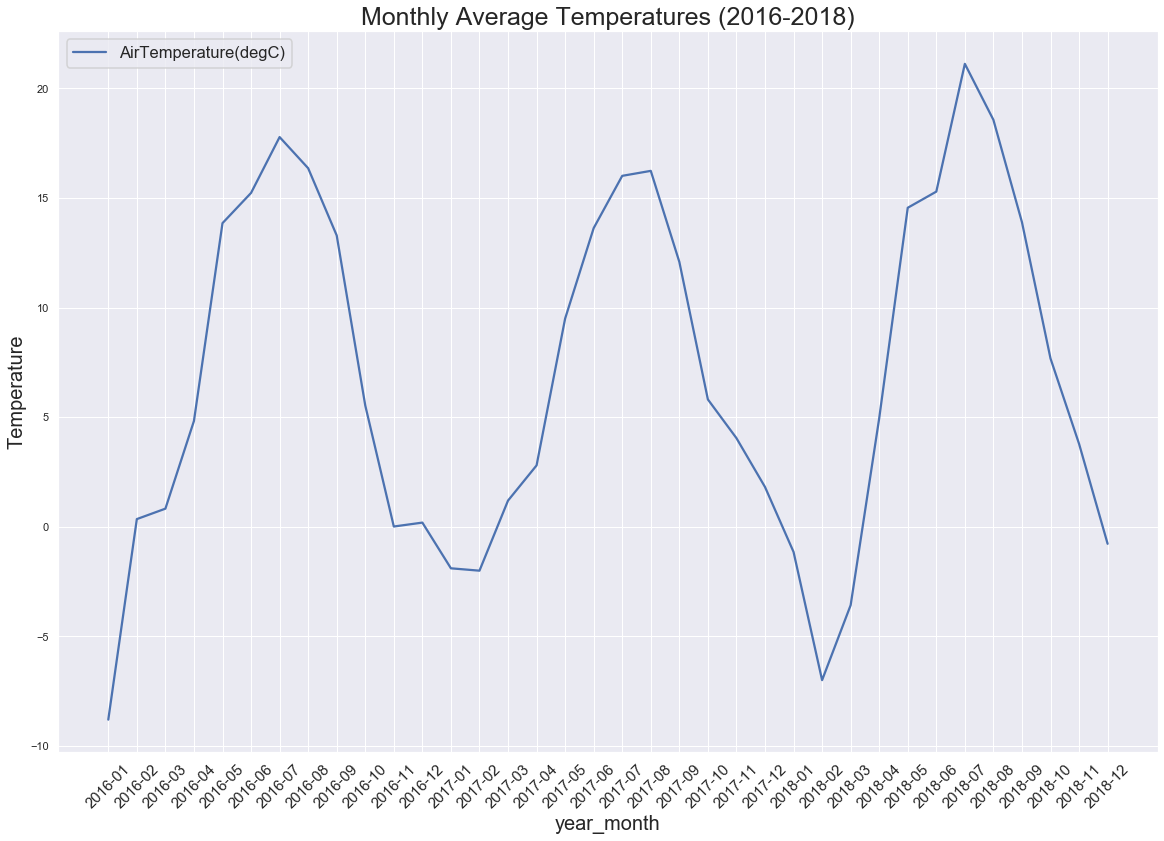

In [68]:
# Temperatures
df['year_month'] = pd.to_datetime(df['Date']).dt.to_period('M')
toplot = df[['year_month','AirTemperature(degC)']]
toplot1 = toplot.groupby(['year_month']).mean()
toplot1.index=toplot1.index.to_series().astype(str)

#toplot.head()
sns.set(rc={'figure.figsize':(19.7,13.27)})
plt.ylabel("Temperature", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.xlabel("Year_Month", fontsize=20)
plt.title("Monthly Average Temperatures (2016-2018)", fontsize=25)
sns.set_context("talk")
sns.lineplot(data = toplot1)

C:\Users\seppo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Temperature')

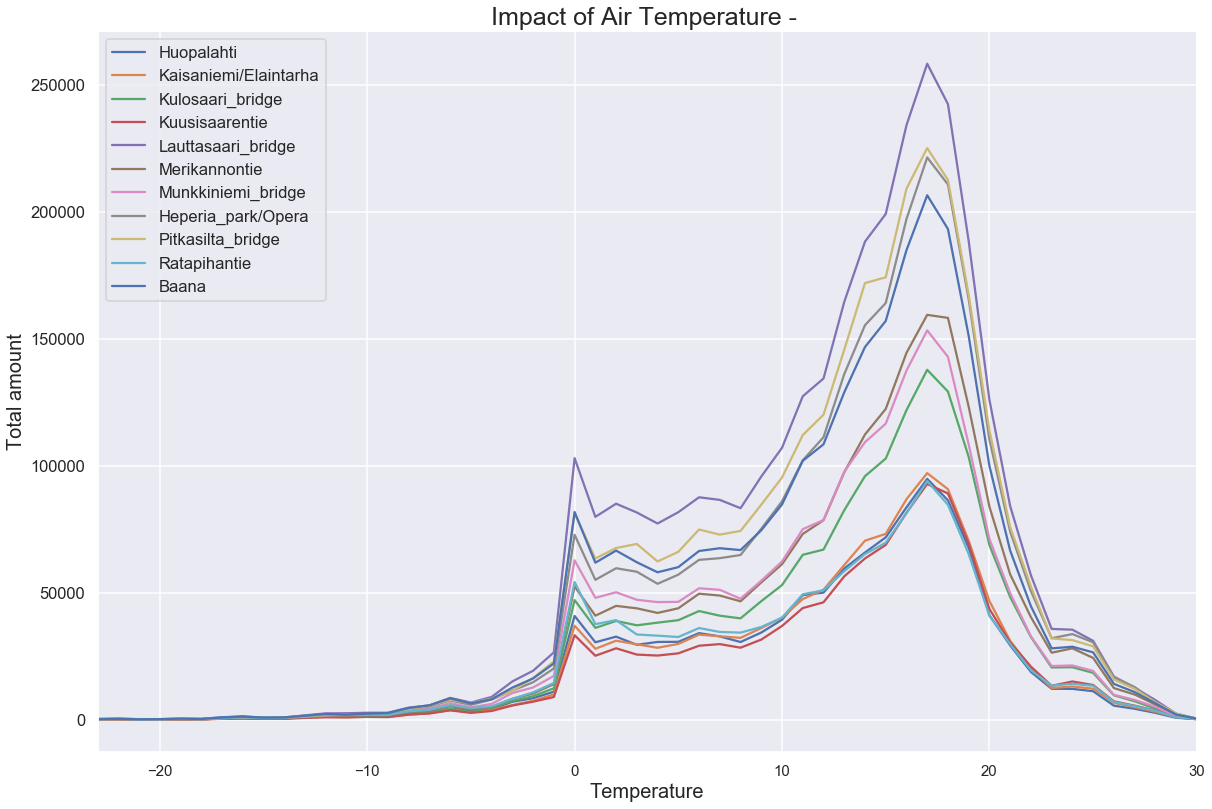

In [69]:
# Impact of Air temperature
dfa = df.dropna(axis=0)
dfa['AirTemperatureInt'] = dfa['AirTemperature(degC)'].astype(int)
TemperatureGroups = dfa.groupby('AirTemperatureInt').sum()
TemperatureGroups
TemperatureGroups.reset_index().plot(x='AirTemperatureInt', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']))
plt.title("Impact of Air Temperature - ", fontsize=25)
plt.ylabel("Total amount", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel("Temperature", fontsize=20)


In [70]:
# The reason for the shape is that there are a lot of measurements around 0 and 14-16
dfa['AirTemperatureInt'].value_counts()

 0     2411
 1     1496
 2     1263
 3     1155
 14    1048
 16    1030
 17     995
 15     970
 13     939
 4      939
 12     822
 18     797
 5      793
 11     782
 6      741
-1      722
 9      706
 10     698
 7      651
 8      646
 19     614
-2      519
 20     408
-3      390
-4      348
-5      302
-6      292
 21     285
-7      216
 22     200
-8      197
-9      137
 23     135
-10     106
 24     105
-11     102
 25      94
-12      93
-13      76
-14      64
-16      56
 26      54
-15      53
-17      48
 27      38
-19      27
 28      24
-18      23
-23      19
-20      17
-22      15
-21      11
 29       9
 30       1
Name: AirTemperatureInt, dtype: int64

C:\Users\seppo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Temperature')

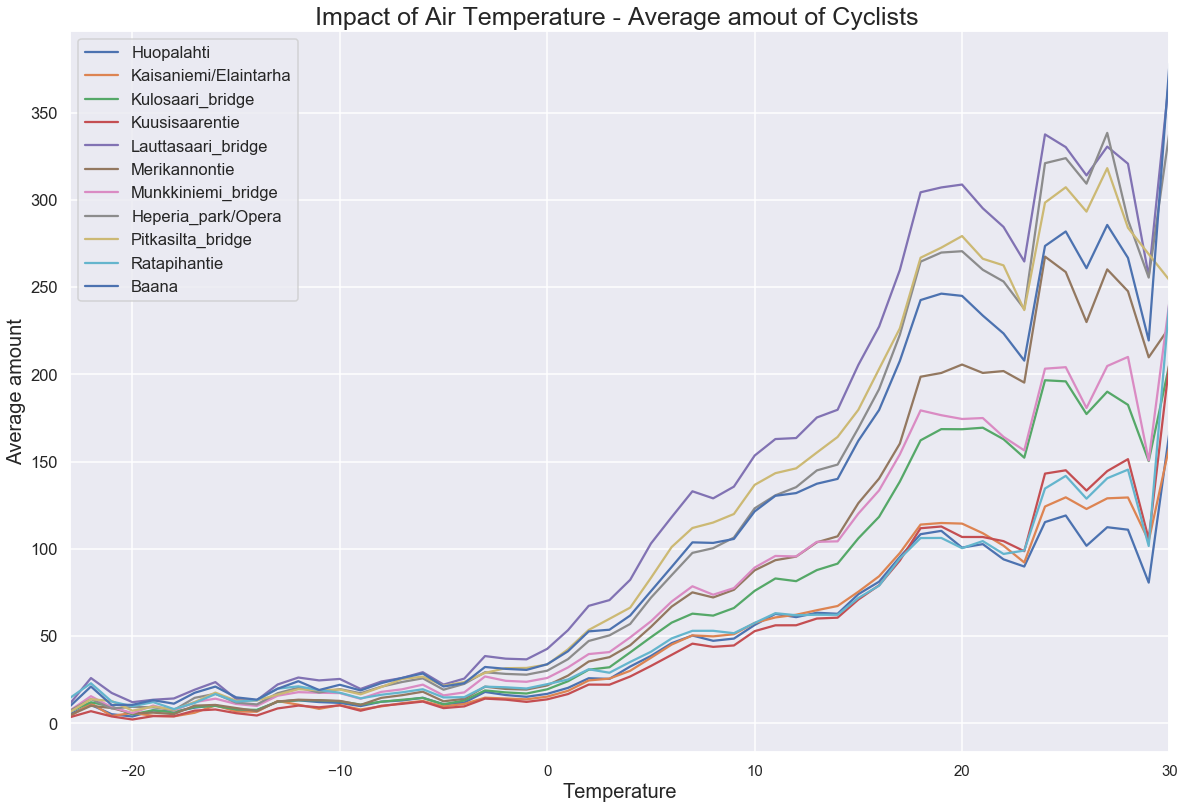

In [72]:
# Lets look at averages
dfb = df.dropna(axis=0)
dfb['AirTemperatureInt'] = dfb['AirTemperature(degC)'].astype(int)
TemperatureGroupsAvg = dfa.groupby('AirTemperatureInt').mean()
TemperatureGroupsAvg.reset_index().plot(x='AirTemperatureInt', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']))
plt.title("Impact of Air Temperature - Average amout of Cyclists ", fontsize=25)
plt.ylabel("Average amount", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel("Temperature", fontsize=20)


C:\Users\seppo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Temperature')

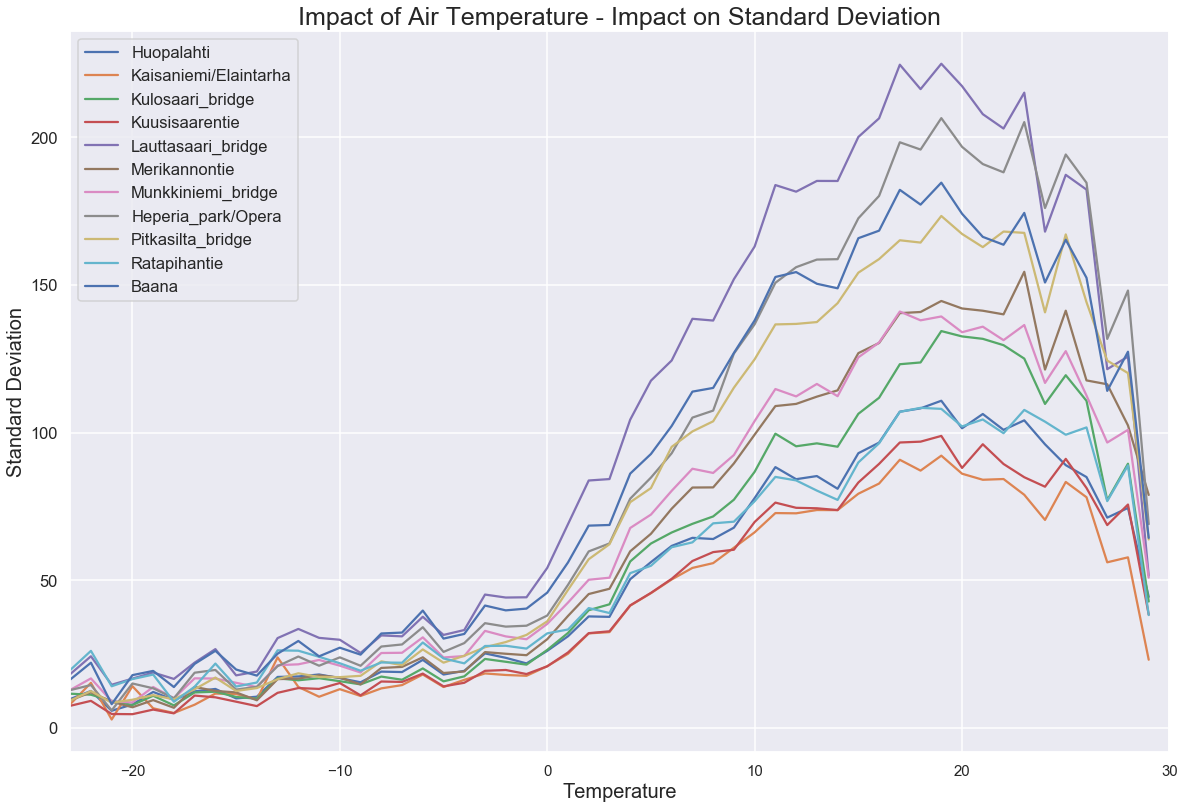

In [73]:
# Lets look at std deviation
# dfb = df.dropna(axis=0)
dfb['AirTemperatureInt'] = dfb['AirTemperature(degC)'].astype(int)
TemperatureGroupsAvg = dfa.groupby('AirTemperatureInt').std()
TemperatureGroupsAvg.reset_index().plot(x='AirTemperatureInt', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']))
plt.title("Impact of Air Temperature - Impact on Standard Deviation", fontsize=25)
plt.ylabel("Standard Deviation", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel("Temperature", fontsize=20)


C:\Users\seppo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Temperature')

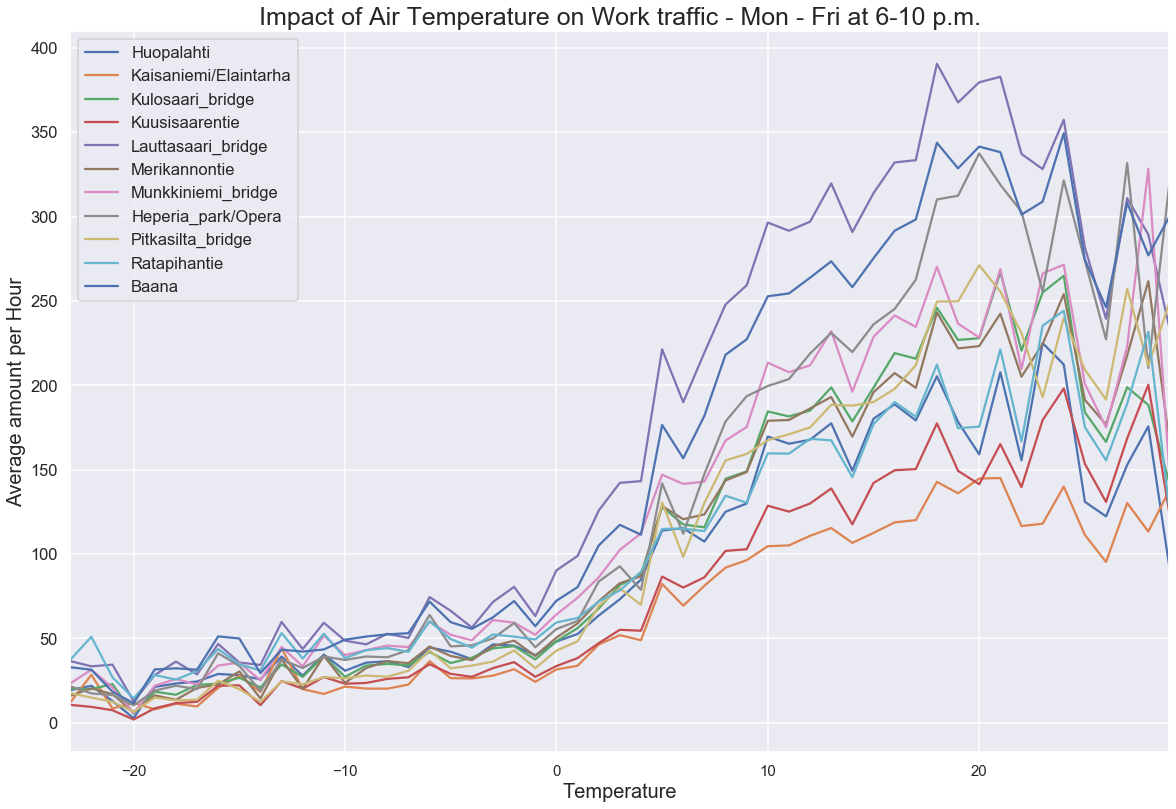

In [74]:
# Lets look at Monday - Friday at 6 - 10 a.m. i.e. traffc to work

dfb = df.dropna(axis=0)
dfb['AirTemperatureInt'] = dfb['AirTemperature(degC)'].astype(int)

dfb = dfb.loc[(df['Weekday'].isin(['Mon','Tue','Wed','Thu','Fri'])) & (df['Time'].isin(['06:00','07:00','8:00','09:00']))]
TemperatureGroupsAvg = dfb.groupby('AirTemperatureInt').mean()
TemperatureGroupsAvg.reset_index().plot(x='AirTemperatureInt', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']))
plt.title("Impact of Air Temperature on Work traffic - Mon - Fri at 6-10 p.m.", fontsize=25)
plt.ylabel("Average amount per Hour", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel("Temperature", fontsize=20)



C:\Users\seppo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Temperature')

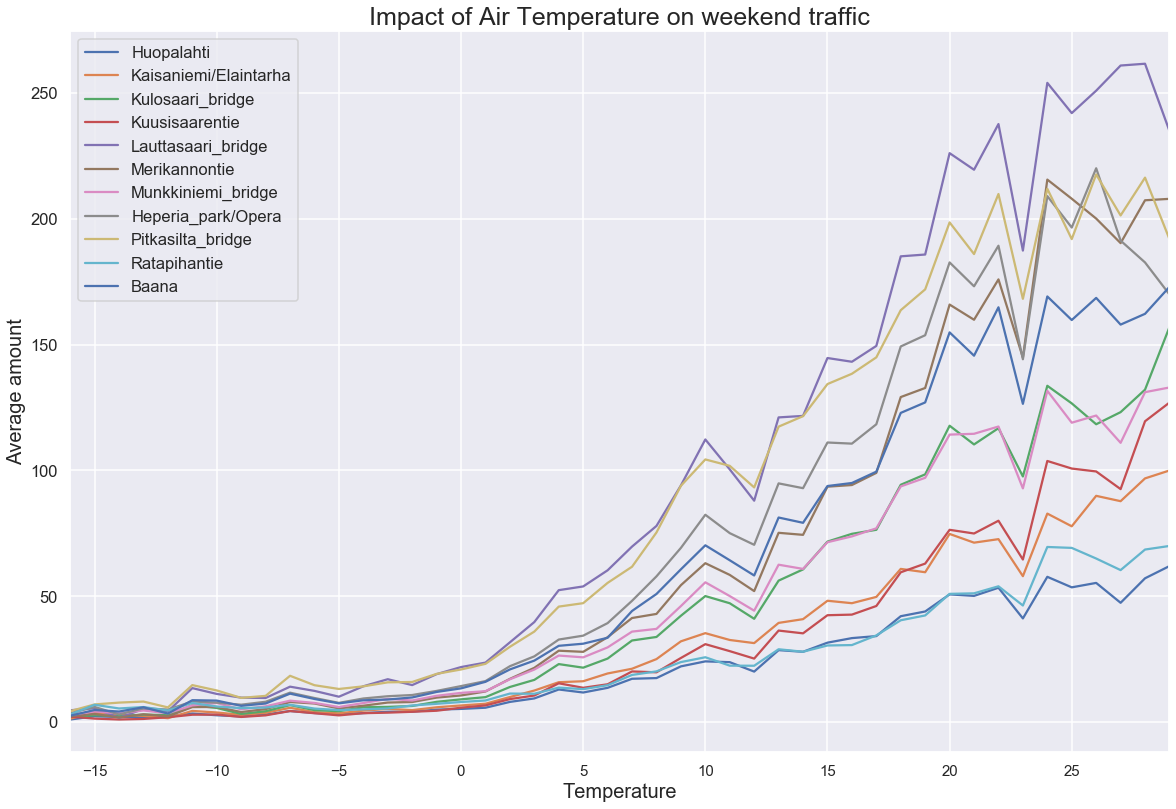

In [75]:
# Weekends
dfb = df.dropna(axis=0)
dfb['AirTemperatureInt'] = dfb['AirTemperature(degC)'].astype(int)
dfb = dfb.loc[(df['Weekday'].isin(['Sat','Sun']))]
TemperatureGroupsAvg = dfb.groupby('AirTemperatureInt').mean()
TemperatureGroupsAvg.reset_index().plot(x='AirTemperatureInt', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']))
plt.title("Impact of Air Temperature on weekend traffic", fontsize=25)
plt.ylabel("Average amount", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel("Temperature", fontsize=20)


# 13. Impact of Humidity

C:\Users\seppo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Relative Humidity')

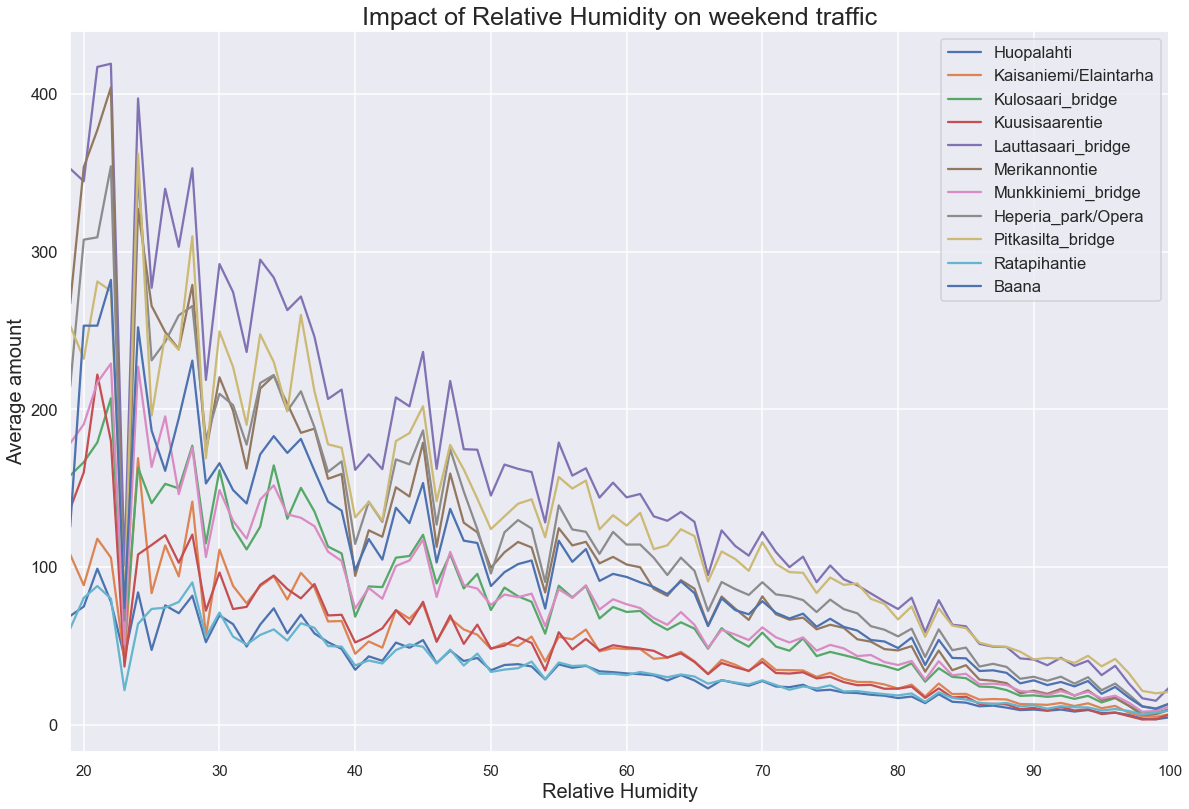

In [76]:
# Weekends
dfc = df.dropna(axis=0)
dfc['RelativeHumidity(%)'] = dfb['RelativeHumidity(%)'].astype(int)
dfb = dfb.loc[(df['Weekday'].isin(['Sat','Sun']))]
TemperatureGroupsAvg = dfb.groupby('RelativeHumidity(%)').mean()
TemperatureGroupsAvg.reset_index().plot(x='RelativeHumidity(%)', y=(['Huopalahti', 'Kaisaniemi/Elaintarha',
        'Kulosaari_bridge', 'Kuusisaarentie',
       'Lauttasaari_bridge', 'Merikannontie',
       'Munkkiniemi_bridge',
       'Heperia_park/Opera', 'Pitkasilta_bridge',
       'Ratapihantie', 'Baana']))
plt.title("Impact of Relative Humidity on weekend traffic", fontsize=25)
plt.ylabel("Average amount", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel("Relative Humidity", fontsize=20)


# 14. Pairplots

In [77]:
sns.pairplot(df, vars=['AirTemperature(degC)', 'RelativeHumidity(%)','WindSpeed(m/s)','Kuusisaarentie','Merikannontie','Baana'])

C:\Users\seppo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\seppo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


# THE FOLLOWING IS DONE WITH OLD DATA BUT - REDUNDANT

# Air Temperature impact std deviations

# 7. Impact of snow depth

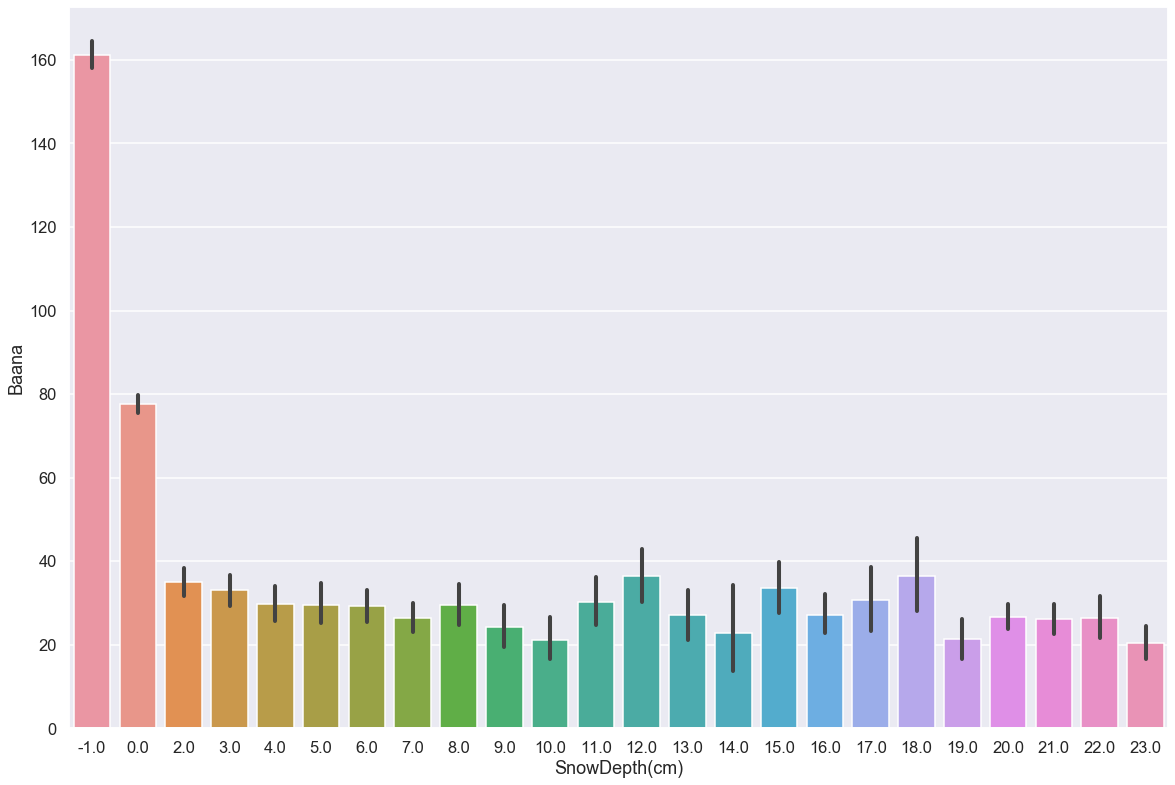

In [78]:
sns.barplot(x="SnowDepth(cm)", y="Baana", data=df)

# Trying Clustering - No success yet

In [ ]:
sns.scatterplot(x="AirTemperatureInt", y="SnowDepth(cm)", data=dfa)

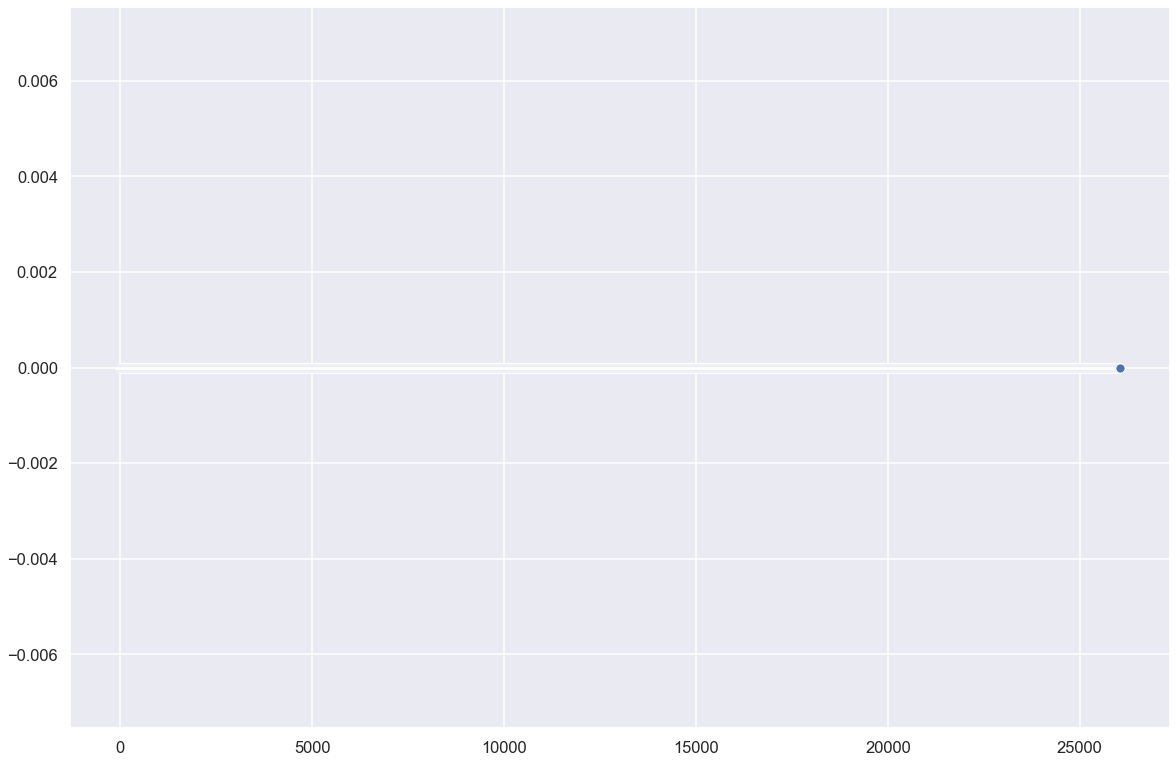

In [109]:
from sklearn.cluster import KMeans

#X[['AirTemperature(degC)','SnowDepth(cm)']] = df[['AirTemperature(degC)','SnowDepth(cm)']]
X = dfa[['AirTemperature(degC)','SnowDepth(cm)']].to_numpy()


m, n = X.shape    # Get the number of data points m and number of features n

k = 5    # Define number of clusters to use

cluster_means = np.zeros((k,n))    # Store the resulting clustering means in the rows of this np array
cluster_labels = np.zeros(m)    # Store here the resulting cluster indices (one for each data point)

k_means = KMeans(n_clusters = k, max_iter = 10).fit(X)  # Apply k-means with k=3 cluster and using maximum 100 iterations
cluster_means = k_means.cluster_centers_    # Get cluster means (centers)
cluster_indices = k_means.labels_           # Get the cluster labels for each data point

# Plot the clustered data
sns.scatterplot(data=cluster_labels)